### Because the file containing the data is not my own it is not available for download. Therefore I will explain the problem in question:
Note: The data is presented in different batches. Each batch is made in one day. Each of these lots has ten density samples.
To have a more precise solution to the behavior of the system, samples of five densities were taken. 

The following data represents the density of ink when printing books.


On Mondays the operators are free and are replaced by other operators with less experience

the **optimum density** is 1.1

The **upper limit** is 1.2


and the **lower limit** is 1


In [157]:
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
df = pd.read_excel('densidad_optica.xlsx')

In [3]:
df

,N° DE LOTE,FECHA,HORARIO,DENSIDAD OPTICA
0,PS-1000,2018-01-01,01:00:00,1.32
1,PS-1000,2018-01-01,01:20:00,1.25
2,PS-1000,2018-01-01,01:40:00,1.10
3,PS-1000,2018-01-01,02:00:00,1.23
4,PS-1000,2018-01-01,02:20:00,1.22
...,...,...,...,...
625,PS-7200,2018-03-04,02:40:00,1.23
626,PS-7200,2018-03-04,03:00:00,1.22
627,PS-7200,2018-03-04,03:20:00,1.19
628,PS-7200,2018-03-04,03:40:00,1.19


### Average

In [4]:
def data_plot(n):
    value = 0
    cont = 0
    AVERAGE = []
    RANGE = []
    range_tem = []
    for row in df['DENSIDAD OPTICA']:
        #print(row)
        cont +=1 
        value = value + row
        range_tem.append(row)
        if cont == n: # this checks if the size of the sample is equal to n
            AVERAGE.append(round((value/n),4))
            cont = 0
            value = 0
            RANGE.append(max(range_tem) - min(range_tem))
            range_tem.clear()
        else:
            continue

    average_density = sum(AVERAGE)/len(AVERAGE)
    average_range = sum(RANGE)/len(RANGE) 
    return [AVERAGE, average_density,average_range] 
    

### Histogram

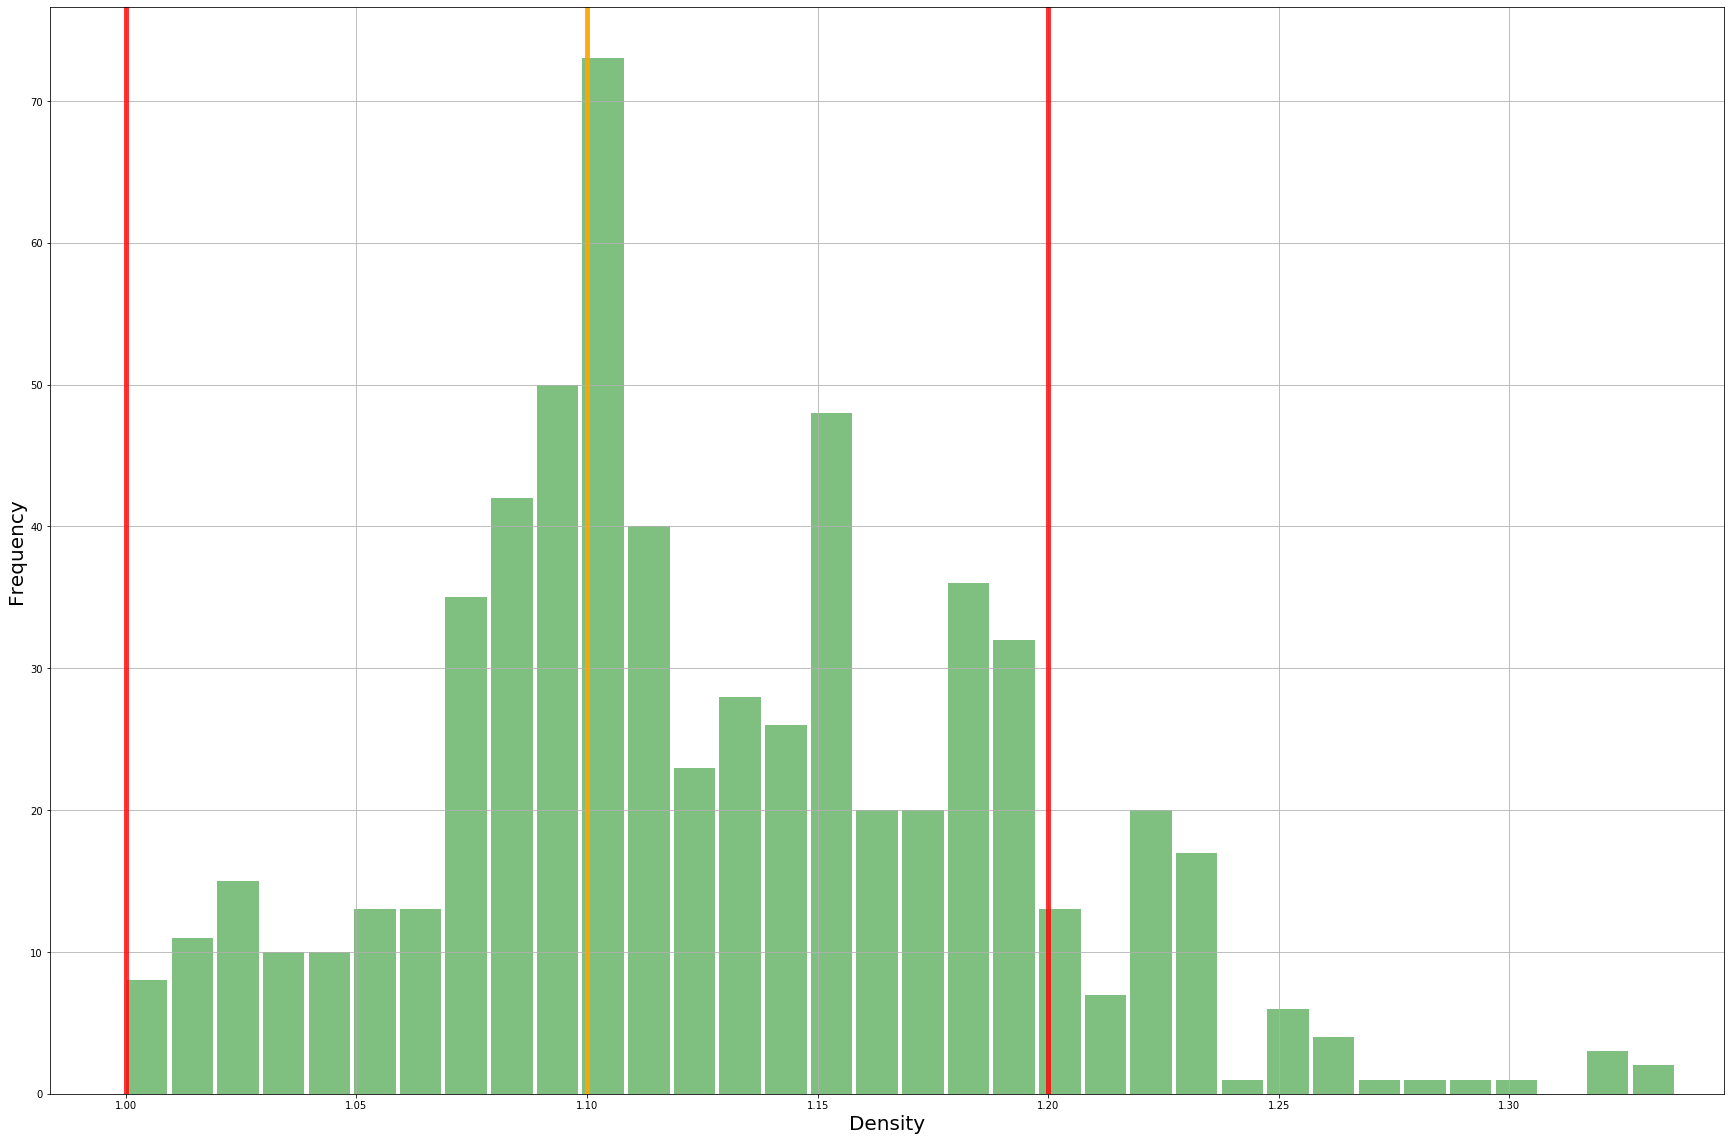

In [155]:
denisity_list = df['DENSIDAD OPTICA'].values.tolist()

plt.figure(figsize=(30, 20))
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('Density',fontsize=20)
plt.grid(True)

plt.hist(denisity_list, color='g', bins=100,alpha=0.5,width=0.009)

plt.axvline(x=1.1, color='orange',linewidth=5, alpha = 0.9)
plt.axvline(x=1, color='red',linewidth=5,alpha = 0.8)
plt.axvline(x=1.2, color='red',linewidth=5,alpha = 0.8)

### Histogram analysis


When analyzing the graph obtained, the following conclusions were drawn:
* Approximately one third of the bars are outside the requirements
specific (exceed LS value). However most of the data is
grouped within LS (red line) and LI (red lin), with a higher concentration to the right of the
objective (orange line).
* The curve is skewed to the right due to a greater
data concentration to the left of the central value (median).
* It has a great variation, because if a curve were drawn that passes through
the ends of the bars, a curve would be observed approximately
platicúrtica.
* A single peak is noted, represented by the highest bar that is at
left of the target.

It would be desirable to have a curve of the normal leptokurtic type, where most of
the data are close to the mean of the function and that this coincides with the objective of
production (value 1.1). Furthermore, it would be necessary to decrease the variation so that all

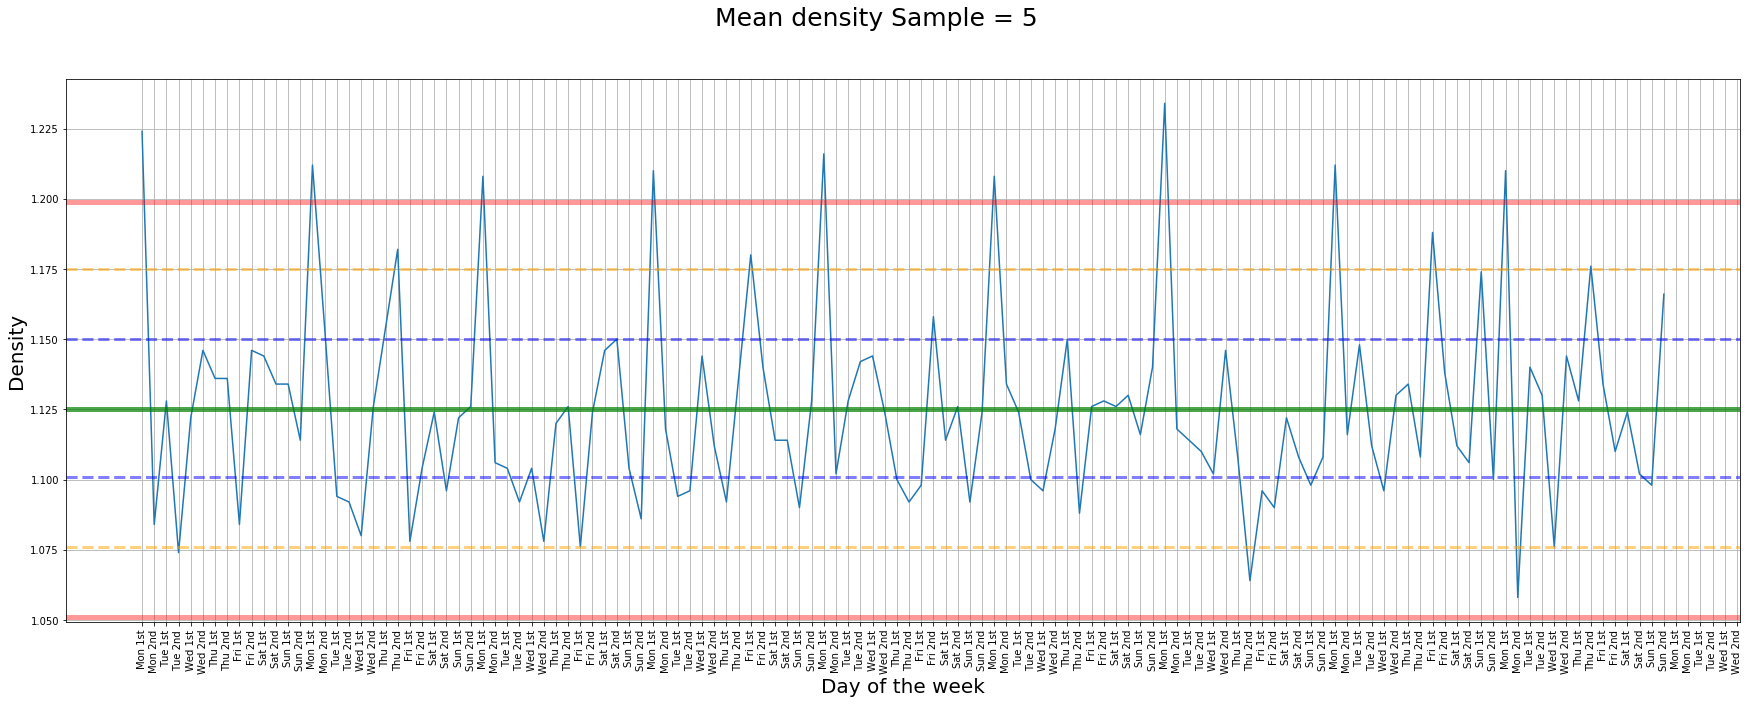

In [156]:
dias = ['Mon 1st','Mon 2nd','Tue 1st','Tue 2nd','Wed 1st','Wed 2nd','Thu 1st','Thu 2nd','Fri 1st','Fri 2nd','Sat 1st','Sat 2nd','Sun 1st','Sun 2nd']
dias = dias*10
mapeado = range(len(dias))

plt.figure(figsize=(30, 10))
plt.suptitle(f'Mean density Sample = 5',fontsize=25)
plt.ylabel('Density',fontsize=20)
plt.xlabel('Day of the week',fontsize=20)
plt.xticks(mapeado,dias,rotation=90,fontsize=10)
plt.grid(True)

AVERAGE = data_plot(5)[0]

plt.plot(AVERAGE)


lims = 1.199
limi = 1.051
asup = 1.150
ainf = 1.101
bsup = 1.175
binf = 1.076
media = 1.125


plt.axhline(y=media, color='green', linewidth=5,alpha=0.7)
plt.axhline(y=lims, color='red',linewidth=5,alpha=0.4)
plt.axhline(y=limi, color='red',linewidth=5,alpha=0.4)
plt.axhline(y=bsup ,color='orange',linewidth=3,linestyle='dashed',alpha=0.5)
plt.axhline(y=asup, color='blue',linewidth=3,linestyle='dashed',alpha=0.5)
plt.axhline(y=binf, color='orange',linewidth=3,linestyle='dashed',alpha=0.5)
plt.axhline(y=ainf, color='blue',linewidth=3,linestyle='dashed',alpha=0.5)
plt.show()


### Control graphic analysis
In the graph of means, it is observed that there are nine points that are above the
upper limit, these represent the optical densities corresponding to Monday
of the sampling period. These days production workers are frankly
so they are replaced by frankers who are not trained. It is observed that
points that are outside the established limits exceed the maximum tolerance since
Gives an excessive opening of the ink fountain pegs generating a black ink repaint. In
On the days between Monday the values are within the limits of
specification and although variations are observed, most of the data is found
close to the average and the production target (value 1.1).



##### It would be convenient to make the same analysis in the same way for the range of data presented. For the purposes of this work I consider it sufficient to show the previous result